<a href="https://colab.research.google.com/github/Eereenah/quantum-computing/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical probability distributions

**Exercise 1** (1 point). Recall that in classical con flipping, get heads with probability $P(X=0) = p_0$ and tails with $P(X=1) = p_1$ for each toss of the coin, where $p_i\geq 0$ for all $i$, and the probabilities sum to one: $\sum_i p_i = 1$. Create a sample with a 1000 data points using numpy, with a probability of getting tails being 0.3. This is the parameter that the `binomial` function takes. Store the outcome in an array called `x_data`.

In [0]:
import numpy as np

In [0]:
n_samples = 1000
#
# YOUR CODE HERE
p_1 = 0.3
x_data = np.random.binomial(1, p_1, (n_samples))

In [0]:
assert type(x_data) is np.ndarray
assert abs(p_1-x_data.sum()/n_samples) < 0.05

**Exercise 2** (1 point). As you recall, we may also write the probability distribution as a stochastic vector $\vec{p} = \begin{bmatrix} p_0 \\ p_1 \end{bmatrix}$. The normalization constraint on the probability distribution says that the norm of the vector is restricted to one in the $l_1$ norm. In other words, $||\vec{p}||_1 = \sum_i |p_i| = 1$. This would be the unit circle in the $l_1$ norm, but since $p_i\geq 0$, we are restricted to a quarter of the unit circle, just as we plotted above. Write a function that checks whether a given two-dimensional vector is a stochastic vector. That is, it should return `True` if all elements are positive and the 1-norm is approximately one, and it should return `False` otherwise. The input of the function is a numpy array.

In [0]:
def is_stochastic_vector(p: np.array):
    #
    # YOUR CODE HERE
    if np.isclose(np.linalg.norm(p, ord = 1), 1):
        return True
    return False

In [0]:
assert is_stochastic_vector(np.array([0.2, 0.3])) is False
assert is_stochastic_vector(np.array([-0.2, 0.7])) is False
assert is_stochastic_vector(np.array([0.2, 0.8])) is True

**Exercise 3** (1 point). The probability of heads is just the first element in the $\vec{p}$ and we can use a projection to extract it. For the first element of the stochastic vector, the projection is described by the matrix $\begin{bmatrix} 1 & 0\\0 & 0\end{bmatrix}$. Write a function that performs this projection on a two-element vector described by a numpy array. Your output after the projection is also a two-element vector.

In [0]:
def project_to_first_basis_vector(p: np.array):
    #
    # YOUR CODE HERE
  return np.array([[1, 0], [0, 0]]).dot(p)

In [0]:
assert np.alltrue(project_to_first_basis_vector(np.array([0.2, 0.3])) == np.array([0.2, 0.])) == True
assert np.alltrue(project_to_first_basis_vector(np.array([1., 0.])) == np.array([1., 0.])) == True

**Exercise 4** (1 point). The projection operators introduce some linear algebra to working with probability distributions. We can also use linear algebra to transform one probability distribution to another. A left *stochastic matrix* will map stochastic vectors to stochastic vectors when multiplied from the left: its columns add up to one. Write a function that takes a matrix and a vector as input arguments (both are numpy arrays), checks whether the vector is a stochastic vector and whether the matrix is left stochastic. If they are, return the matrix applied to the vector, otherwise raise a `ValueError`. You can call the function `is_stochastic_vector` that you defined above.

In [0]:
def apply_stochastic_matrix(p: np.array, M: np.array):
    """Apply the matrix M to the vector p, but only if
    p is a stochastic vector and M is a left stochastic
    matrix. Otherwise raise a ValueError.
    """
    #
    # YOUR CODE HERE
    if is_stochastic_vector(M.dot(p)) and is_stochastic_vector(p):
      return M.dot(p)
    else:
      raise ValueError


In [0]:
p = np.array([[.5], [.5]])
M = np.array([[0.7, 0.6], [0.3, 0.4]])
assert abs(np.linalg.norm(apply_stochastic_matrix(p, M), ord=1)-1) < 0.01
M = np.array([[0.7, 0.6], [0.3, 0.5]])
try:
    apply_stochastic_matrix(p, M)
except ValueError:
    pass
else:
    raise AssertionError("did not raise")

**Exercise 5** (1 point). Create a left stochastic matrix in a variable called `M` that transforms the uniform distribution $\vec{p}= \begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}$ to $\begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}$. `M` should be a two-dimensional numpy array.

The resulting matrix should have the form $M= \begin{bmatrix} a \ 0 \\ 0 \ b \end{bmatrix}$ and we'll have $a \cdot 0.5 = 0.6$ and $b \cdot 0.5 = 0.4$



In [0]:
#
# YOUR CODE HERE
M = np.array([[1.2, 0], [0, 0.8]])

In [0]:
assert np.alltrue(M.dot(np.array([0.5, 0.5])) == np.array([0.6, 0.4])) == True

**Exercise 6** (1 point). Calculate the entropy of this distribution $\begin{bmatrix} 0.6 \\ 0.4 \end{bmatrix}$ in a variable called `H`.

In [0]:
#
# YOUR CODE HERE
H = -(0.6*np.log2(0.6) + 0.4*np.log2(0.4))


# Quantum states

**Exercise 7** (1 point). A quantum state is a probability distribution. A qubit state is a distribution over two values, similar to the coin flipping in the classical state. A major difference is that the entries are complex numbers and the normalization is in the $l_2$ norm. Create a function similar to `is_stochastic_vector` that checks whether a vector is a valid quantum state. The input is a numpy array and the output should be boolean.

In [0]:
def is_quantum_state(psi: np.array):
    #
    # YOUR CODE HERE
  if np.isclose(np.linalg.norm(psi, ord=2), 1):
      return True
  return False

In [0]:
assert is_quantum_state(np.array([1/np.sqrt(2), 1/np.sqrt(2)]))
assert is_quantum_state(np.array([-1/np.sqrt(2), 1/np.sqrt(2)]))
assert is_quantum_state(np.array([-1/3, 2*np.sqrt(2)/3]))
assert is_quantum_state(np.array([0.2, 0.8])) is False

**Exercise 8** (1 point). While working with numpy arrays is convenient, it is better to use a framework designed for quantum computing, since it often allows us to execute a circuit directly on a quantum computer. In your preferred framework, implement a circuit of a single qubit with no operation on it. You should create it in an object called `circuit`. Do not add a measurement. The evaluation will automatically branch according to which framework you chose.

In [0]:
! pip install qiskit

In [0]:
from assignment_helper import *

In [0]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)

In [0]:
amplitudes = get_amplitudes(circuit)
assert abs(amplitudes[0]-1.0) < 0.01

**Exercise 9** (1 point). In the execution branching above, you see that we use the wavefunction simulator. This allows us to use the probability amplitudes as usual numpy arrays, as you can see above. If we ran the circuit on an actual quantum device, we would not be able to inspect the wavefunction, but we would have to rely on the statistics of measurements to understand what is happening in the circuit.

Create a circuit in your preferred framework that creates an equal superposition in a qubit using a Hadamard gate. Again, the name of the object should be `circuit`. The evaluation will be based on measurement statistics. In this case, you should explicitly specify the measurement on the qubit

In [19]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.measure(q[0], c[0])
circuit.draw()

┌───┐┌─┐
q1_0: |0>┤ H ├┤M├
         └───┘└╥┘
 c1_0: 0 ══════╩═

In [0]:
counts = get_counts(circuit)
assert abs(counts['0']/100-.5) < 0.2

**Exercise 10** (1 point). If you plotted the state before measurement on the Bloch sphere, it would have been on the equator halfway between the $|0\rangle$ and $|1\rangle$ states, and the tip of the X axis. If you apply the Hadamard on the $|1\rangle$, it would have been the point on the opposite and of the X axis, since the resulting superposition would have had a -1 amplitude for $|1\rangle$. The measurement statistics, however, would be identical. The negative sign plays a role in interference: for instance, applying a Hadamard again, would take you back to $|1\rangle$. Create the superposition after applying the Hadamard gate on $|1\rangle$. We will verify whether it picked up the phase. Do not include a measurement, since we will inspect the wavefunction.

In [21]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0]) #flip from 0 to 1
circuit.h(q[0])
circuit.draw()

┌───┐┌───┐
q2_0: |0>┤ X ├┤ H ├
         └───┘└───┘
 c2_0: 0 ══════════

In [0]:
amplitudes = get_amplitudes(circuit)
assert abs(amplitudes[1]+np.sqrt(2)/2) < 0.01

# More qubits and entanglement

**Exercise 11** (1 point). To get a sense of multiqubit states, it is important to be confident with the tensor product operation. Create a function that returns the four basis vectors, $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$, of the tensor product space $\mathbb{C}^2\otimes\mathbb{C}^2$. The order in which they appear does not matter. The return value should be a list of four numpy arrays.

In [0]:
def create_canonical_basis():
    #
    # YOUR CODE HERE
    q0 = np.array([[1], [0]])
    q1 = np.array([[0], [1]])
    return [np.kron(q0, q0), np.kron(q0, q1), np.kron(q1, q0), np.kron(q1, q1)]

In [24]:
print(create_canonical_basis())

[array([[1],
       [0],
       [0],
       [0]]), array([[0],
       [1],
       [0],
       [0]]), array([[0],
       [0],
       [1],
       [0]]), array([[0],
       [0],
       [0],
       [1]])]


**Exercise 12** (1 point). A generic product state has the form  $\begin{bmatrix}a_0b_0\\ a_0b_1\\ a_1b_0\\ a_1b_1\end{bmatrix}=a_0b_0|00\rangle + a_0b_1|01\rangle + a_1b_0|10\rangle + a_1b_1|11\rangle$ on $\mathbb{C}^2\otimes\mathbb{C}^2$, but not all. We can use the basis vectors to form vectors in the space that do not have a product structure. These are entangled states that show strong correlations. Entanglement is an important resource in quantum computing and being able to create a circuit that generates an entangled state is critical. Implement a circuit in your preferred framework to create the $|\phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)$ state, that is, almost the same as the $|\phi^+\rangle$ state, but with the opposite sign of the probability amplitude of $|11\rangle$. Do not include a measurement, as we will verify the state with the wavefunction simulator

In [25]:
#
# YOUR CODE HERE
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
circuit.cx(q[0],q[1]) #cnot to entangle
circuit.draw()

┌───┐┌───┐     
q3_0: |0>┤ X ├┤ H ├──■──
         └───┘└───┘┌─┴─┐
q3_1: |0>──────────┤ X ├
                   └───┘
 c3_0: 0 ═══════════════
                        
 c3_1: 0 ═══════════════

In [0]:
amplitudes = get_amplitudes(circuit)
assert all(np.isclose(np.array([np.sqrt(2)/2, 0, 0, -np.sqrt(2)/2]), amplitudes))

# Measurements

**Exercise 1** (1 point). Measurements in the quantum computers we can access today always measure in the computational basis. This means that either the projection $|0\rangle\langle 0|$ or the $|1\rangle\langle 1|$ is applied on the qubit we are measuring, corresponding to the outcome 0 or 1. The Born rule tells us that we get either of these with the probability of the absolute value of the probability amplitde squared. The qubit afterwards is $|0\rangle$ or $|1\rangle$, respectively.

First, create circuit in your preferred framewrok with one quantum and two classical registers. The object should be called `circuit`.

In [0]:
from qiskit.tools.visualization import plot_histogram

In [0]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q, c)

**Exercise 2** (1 point). Next, extend the circuit with a Hadamard gate and a measurement on the qubit. Write the measurement result in the first classical register. You will get a probabilistic outcome of 0 or 1.

In [29]:
#
# YOUR CODE HERE
circuit.h(q[0])
circuit.measure(q[0],c[0])
circuit.draw()

┌───┐┌─┐
q4_0: |0>┤ H ├┤M├
         └───┘└╥┘
 c4_0: 0 ══════╩═
                 
 c4_1: 0 ════════

**Exercise 3** (1 point). To see that the quantum state collapses to the basis state indicated by the outcome, apply a second measurement on the same circuit, but write the result in the second register. Executing the program should always give the same outcome in the two subsequent measurements.

In [30]:
#
# YOUR CODE HERE
circuit.measure(q[0],c[1])
circuit.draw()

┌───┐┌─┐┌─┐
q4_0: |0>┤ H ├┤M├┤M├
         └───┘└╥┘└╥┘
 c4_0: 0 ══════╩══╬═
                  ║ 
 c4_1: 0 ═════════╩═

# Measuring multiqubit systems

**Exercise 4** (1 point). We typically work with local measurements, meaning that the qubits are measured separately. Create a two-qubit circuit with measurements included that reproduces the uniform distribution on four outcomes.

In [31]:
#
# YOUR CODE HERE
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.measure(q[0],c[0])
circuit.measure(q[1],c[1])
circuit.draw()

┌───┐┌─┐   
q5_0: |0>┤ H ├┤M├───
         ├───┤└╥┘┌─┐
q5_1: |0>┤ H ├─╫─┤M├
         └───┘ ║ └╥┘
 c5_0: 0 ══════╩══╬═
                  ║ 
 c5_1: 0 ═════════╩═

Using the get_counts function from the assignment helper, plot a histogram of each measurement:


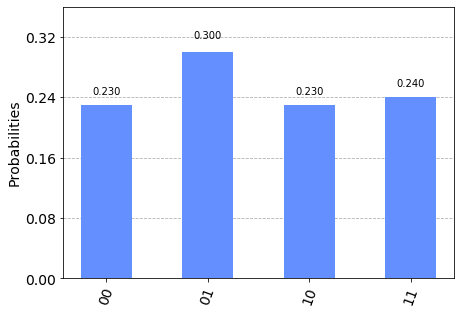

In [32]:
plot_histogram(get_counts(circuit))

The distribution is, in fact, uniform.

**Exercise 5** (1 point). This is a typical product state, showing no correlation between the qubits. In contrast, if you make simultaneous measurements on an entangled state, for instance the $|\phi^+\rangle$ or the $|\phi^-\rangle$ state, the measurement outcomes will be correlated. Create either of these states and measure both qubits.

In [33]:
#
# YOUR CODE HERE
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.measure(q, c)

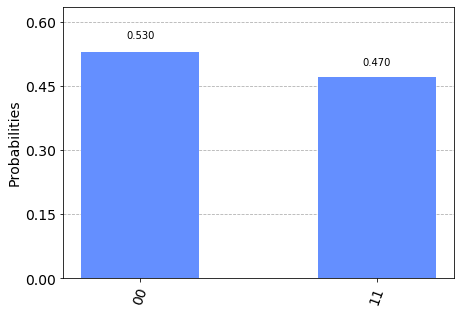

In [34]:
plot_histogram(get_counts(circuit))

Notice that we only observe 00 and 11 as outcomes, even though we made measurements on two spatially separated qubits. If one measurement gives a value, the other one always give the same. 

# Mixed states

**Exercise 6** (1 point). The density matrix formalism is critical in understanding noise models and decoherence, so it is indispensible to start working with current and near-future quantum computers. Many simulator backends provide noise models, but it is out of scope for this course to develop a deep understanding of it.

Instead, let's use the wavefunction simulator to create the (maximally) entangled state $|\phi^+\rangle$. The object should be called circuit and do not include measurements. Your circuit should be in an object called `circuit`.

In [35]:
#
# YOUR CODE HERE
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.draw()

┌───┐     
q7_0: |0>┤ H ├──■──
         └───┘┌─┴─┐
q7_1: |0>─────┤ X ├
              └───┘
 c7_0: 0 ══════════
                   
 c7_1: 0 ══════════

**Exercise 7** (1 point). Create the density matrix called `dm` of the probability amplitudes contained in the `amplitudes` array. Recall that you need a ket and a bra in this order to produce it, but the shape of the `amplitudes` array is incorrect for transposition. Reshape it first

In [36]:
#
# YOUR CODE HERE
amplitudes = get_amplitudes(circuit).reshape(2,2)
bra = amplitudes
ket = bra.T.conj()
dm = ket @ bra
dm

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0.5+0.j]])

Taking the partial trace of a density matrix is the equivalent of taking the marginal of a joint probability distribution along one random variable. If we take the partial trace of this density matrix in any of the qubit subsystems, we are going to get the maximally mixed state, that is, the uniform distribution over the remaining system. This reflects the strong correlation between the two subsystems: if we marginalize over one, we have no predictive power over the other one. We exploit this property when we create protocols for preparing thermal states.


# Unitary evolution

**Exercise 1** (1 point). The conjugate transpose of a unitary matrix is its inverse. Write a function that checks if a $2\times 2$ numpy array is unitary.

In [0]:
def is_unitary(matrix):
    #
    # YOUR CODE HERE
    return (np.allclose(matrix@matrix.T.conj(),np.eye(2)))

In [0]:
X = np.array([[0, 1], [1, 0]])
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
random_matrix = np.random.rand(2, 2)
assert is_unitary(X)
assert is_unitary(H)
assert is_unitary(random_matrix) is False

**Exercise 2** (1 point). The eigenvalues of unitary operators always lie on the complex unit circle. We exploit this property over and over again. For instance, the quantum phase estimation algorithm estimates the eigenvalues through the phase that describes the eigenvalues angle on the complex unit circle. Calculate the eigenvalues of the Hadamard gate and store them in a numpy array called `eigenvalues`.

In [0]:
#
# YOUR CODE HERE
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])
eigenvalues = np.linalg.eigvals(H)

**Exercise 3** (1 point). Unitary operations are reversible. In fact, we often reverse them on purpose: this is called uncomputing, and used, for instance, in the quantum matrix inversion algorithm that underlies many coherent quantum machine learning protocols. The reason we do that is to remove the entanglement we might have created, so that tracing out a subsystem would not interfere with our calculations (the remaining system will not be a mixed state). Create a circuit in your preferred framework that applies the X and H gates in this sequence. The circuit should be in an object called `circuit`.

In [40]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0])
circuit.h(q[0])

In [0]:
from assignment_helper import get_amplitudes
amplitudes = get_amplitudes(circuit)
assert all(np.isclose(amplitudes, np.array([1/np.sqrt(2), -1/np.sqrt(2)])))

**Exercise 4** (1 point). Extend this circuit to reverse the calculations you have done.

In [42]:
#
# YOUR CODE HERE
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, c)
circuit.x(q[0]) #do
circuit.h(q[0])
circuit.h(q[0]) #undo
circuit.x(q[0])

In [0]:
amplitudes = get_amplitudes(circuit)
program_length = get_circuit_length(circuit)
assert all(np.isclose(amplitudes, np.array([1, 0]))), "The circuit is not successfully reversed"
assert program_length == 4, "The circuit does not have the right number of gates"